<a href="https://colab.research.google.com/github/Hamdanay/scientific-computing/blob/main/SC_sesi2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hasil Gauss-Seidel untuk Soal 1: [-8.85379963e+93 -2.65613989e+94  7.96841967e+94]
Hasil dengan Numpy: [0.65 4.15 3.75]

Hasil Gauss-Seidel untuk soal 2: [ 3.00001426 -2.49999286  6.99999971]
Hasil dengan Numpy: [ 3.  -2.5  7. ]

Persamaan regresi: y = 0.00 + 2.00x


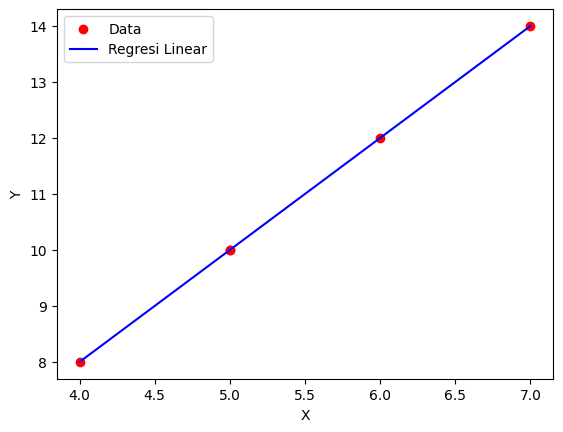

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def gauss_seidel(A, b, x_init, tol=0.001, max_iterations=100):
    n = len(b)
    x = np.array(x_init, dtype=float)
    for _ in range(max_iterations):
        x_new = np.copy(x)
        for i in range(n):
            s = sum(A[i][j] * x_new[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i][i]
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            break
        x = x_new
    return x

# Soal nomer 1
A1 = np.array([[2, 3, -1], [1, -1, 2], [3, 2, 1]])
b1 = np.array([10, 4, 14])
x_init1 = [5, 5, 5]
x_gs1 = gauss_seidel(A1, b1, x_init1)
print("Hasil Gauss-Seidel untuk Soal 1:", x_gs1)
print("Hasil dengan Numpy:", np.linalg.solve(A1, b1))

# Soal nomer 2
A2 = np.array([[3, -0.1, -0.2], [0.1, 7, -0.3], [0.3, -0.2, 10]])
b2 = np.array([7.85, -19.3, 71.4])
x_init2 = [1, 2, 3]
x_gs2 = gauss_seidel(A2, b2, x_init2)
print("\nHasil Gauss-Seidel untuk soal 2:", x_gs2)
print("Hasil dengan Numpy:", np.linalg.solve(A2, b2))

# Regresi Linear Least Squares Method
def least_squares(X, Y):
    n = len(X)
    x_mean = np.mean(X)
    y_mean = np.mean(Y)
    b = sum((X[i] - x_mean) * (Y[i] - y_mean) for i in range(n)) / sum((X[i] - x_mean) ** 2 for i in range(n))
    a = y_mean - b * x_mean
    return a, b

X = np.array([5, 4, 6, 7, 5])
Y = np.array([10, 8, 12, 14, 10])
a, b = least_squares(X, Y)
print("\nPersamaan regresi: y = {:.2f} + {:.2f}x".format(a, b))

# Plot hasil regresi
plt.scatter(X, Y, color='red', label='Data')
x_line = np.linspace(min(X), max(X), 100)
y_line = a + b * x_line
plt.plot(x_line, y_line, color='blue', label='Regresi Linear')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
